# Clustering

Hasta ahora hemos trabajado con métodos supervisados: métodos en los cuales tenemos una etiqueta que aprender en base a unos atributos. En esta sesión trabajaremos con algoritmos no supervisados. Específicamente, estudiaremos diferentes algoritmos de clustering: algoritmos orientados a agrupar datos segun su similitud, sin una etiqueta que los identifique. El objetivo genérico de los algoritmos de clustering es el de reducir las diferencias entre los datos de un cluster, mientras se aumenta la distancia entre los diferentes clusteres.

In [1]:
%pip install pandas matplotlib seaborn scikit-learn scipy kmedoids yellowbrick setuptools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 1.6 MB/s eta 0:00:00-:--:--
Note: you may need to restart the kernel to use updated packages.


Para apreciar las diferencias entre los distintos algoritmos trabajaremos con 6 datasets sinteticos con diferentes formas:

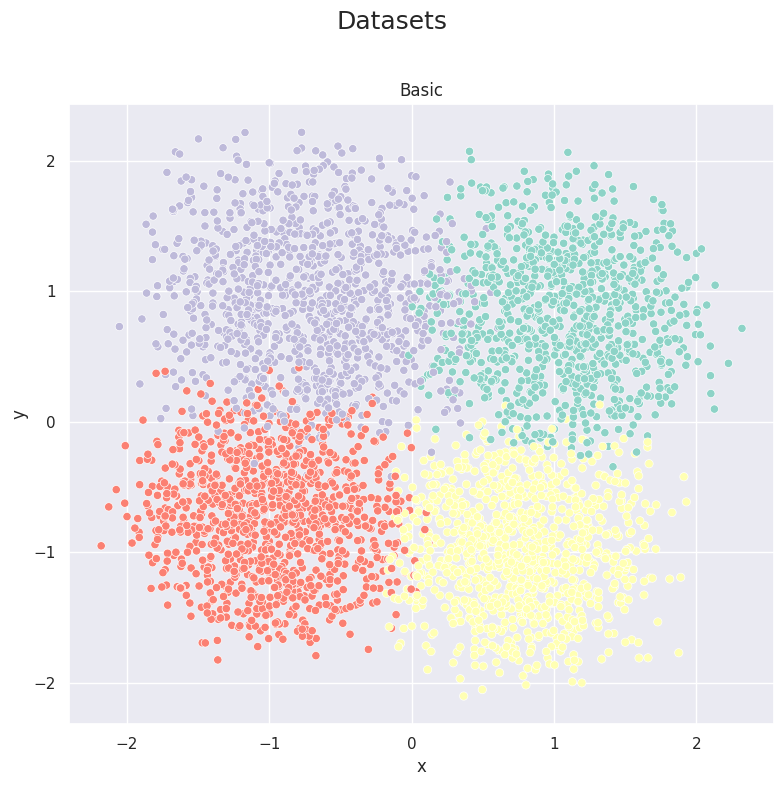

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

sns.set_theme()
sns.set_palette("Set3")

preprocessor = ColumnTransformer([("scaler", StandardScaler(), ["x", "y"])], remainder='passthrough', verbose_feature_names_out=False)

data2 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("Datos/data/data2.csv")), columns=preprocessor.get_feature_names_out())

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 8))
fig.suptitle('Datasets\n', size = 18)

sns.scatterplot(data2, x="x", y="y", hue='color', palette='Set3', ax = axes, legend = False)

axes.set_title("Basic");

plt.tight_layout()

## Distancias

Un factor determinante a la hora de definir un algoritmo de clustering es la elección de la distancia usada para comparar observaciones. Algunos de los algoritmos de clustering nos permiten especificar una metrica de distancia, mientras que otros usan una metrica por defecto que no podemos modificar. Podemos consultar todas las distancias implementadas en `scikit-learn` [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances) y [aqui](https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics.pairwise). Además, `scipy` tambien implementa algunas distancias [aqui](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance).

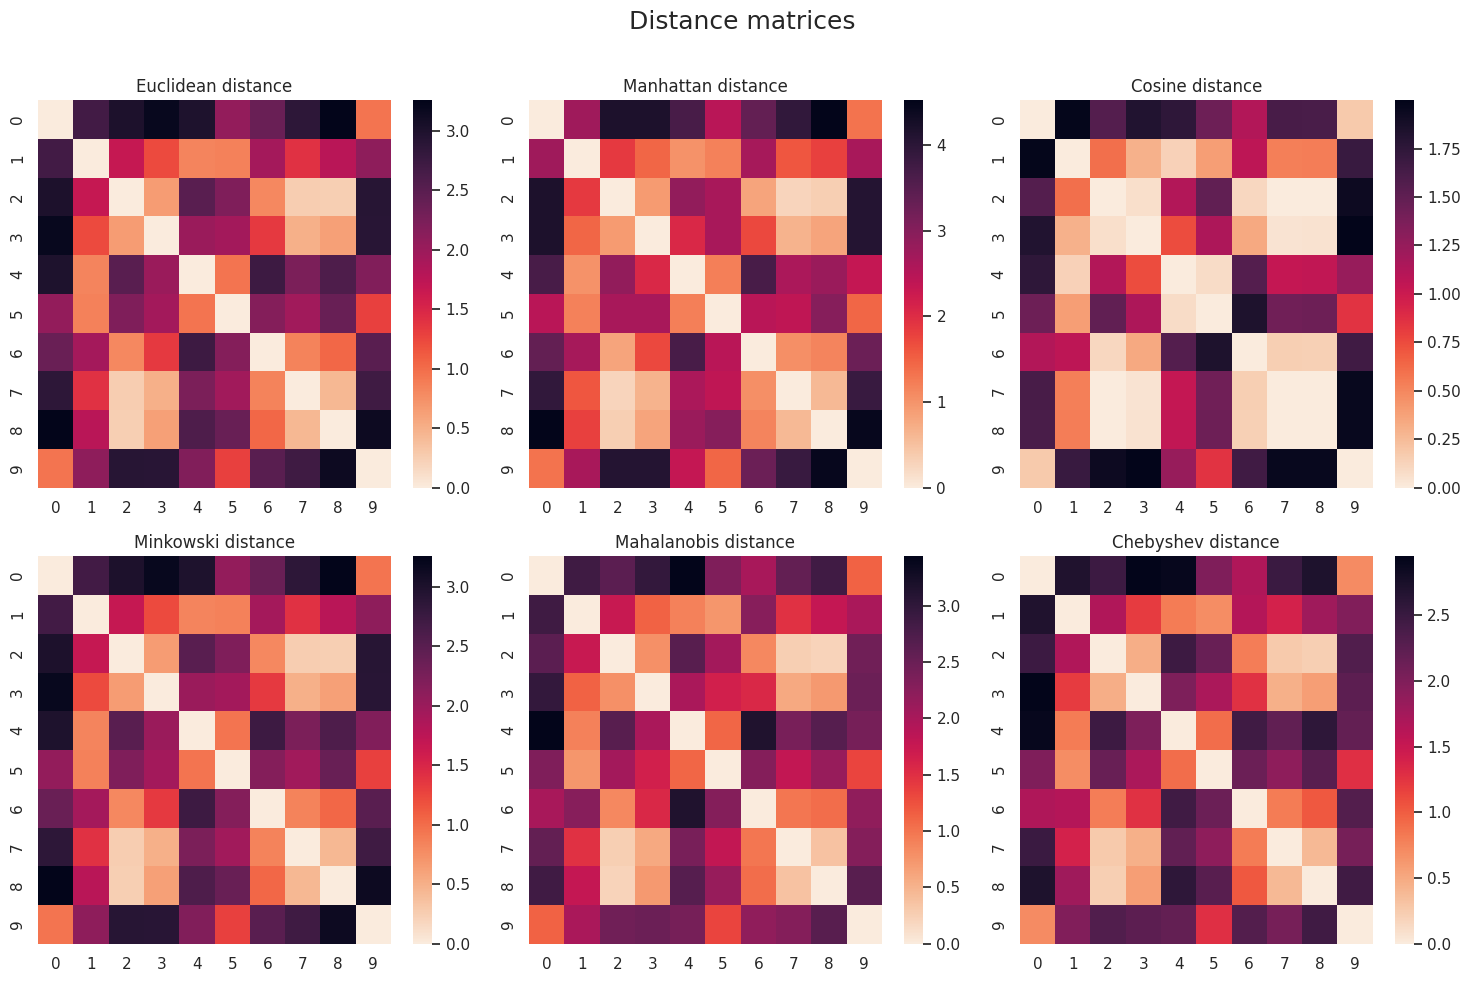

In [9]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances
from scipy.spatial.distance import pdist, squareform

# calculamos las distancias solo para los 10 primeros puntos de data1 para que sea más rápido de calcular y más facil de visualizar
sample = data2.iloc[0:10][["x", "y"]]

euclidean_distances_matrix = euclidean_distances(sample)
manhattan_distances_matrix = manhattan_distances(sample)
cosine_distances_matrix = cosine_distances(sample)
minkowski_distances_matrix = squareform(pdist(sample, metric="minkowski"))
mahalanobis_distances_matrix = squareform(pdist(sample, metric="mahalanobis"))
chebyshev_distances_matrix = squareform(pdist(sample, metric="chebyshev"))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Distance matrices\n', size = 18)

sns.heatmap(euclidean_distances_matrix, ax=axes[0][0], cmap="rocket_r")
sns.heatmap(manhattan_distances_matrix, ax=axes[0][1], cmap="rocket_r")
sns.heatmap(cosine_distances_matrix, ax=axes[0][2], cmap="rocket_r")
sns.heatmap(minkowski_distances_matrix, ax=axes[1][0], cmap="rocket_r")
sns.heatmap(mahalanobis_distances_matrix, ax=axes[1][1], cmap="rocket_r")
sns.heatmap(chebyshev_distances_matrix, ax=axes[1][2], cmap="rocket_r")

axes[0][0].set_title("Euclidean distance");
axes[0][1].set_title("Manhattan distance");
axes[0][2].set_title("Cosine distance");
axes[1][0].set_title("Minkowski distance");
axes[1][1].set_title("Mahalanobis distance");
axes[1][2].set_title("Chebyshev distance");

plt.tight_layout()

plt.show()

<div class="alert alert-info">

**Ejercicio:**

Cual es la distancia euclidea entre las observaciones 55 y 123 del dataset estandarizado `data3`?
</div>

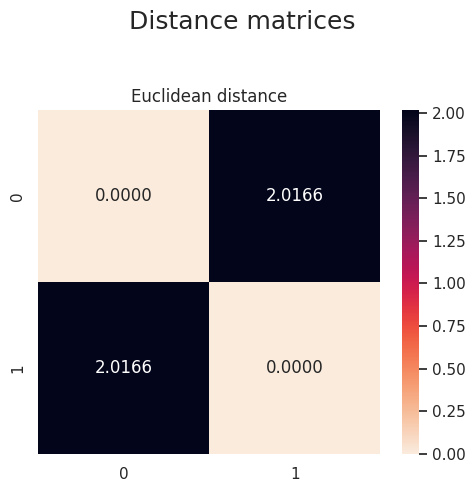

In [10]:
sample = data2.iloc[[54, 122]][["x", "y"]]

euclidean_distances_matrix = euclidean_distances(sample)

fig, ax = plt.subplots(figsize=(5, 5))
fig.suptitle('Distance matrices\n', size = 18)

sns.heatmap(euclidean_distances_matrix, ax=ax, cmap="rocket_r", annot=True, fmt=".4f")

ax.set_title("Euclidean distance");
plt.tight_layout()

plt.show()

## Clustering basado en particionado

Los algoritmos de clustering basados en particiones dividen los datos en un número predefinido de grupos, asignando cada punto a un único clúster. Dos de los algoritmos de particionado más utilizados son el k-Means y el k-Medoids. 

### k-Means

Uno de los métodos más habituales para realizar un agrupamiento por particionado es el k-means. Este método requiere que se determine a priori el número de clusteres deseado, asigna un centroide a cada cluster y finalmente asigna los puntos observados al centroide más cercano. 

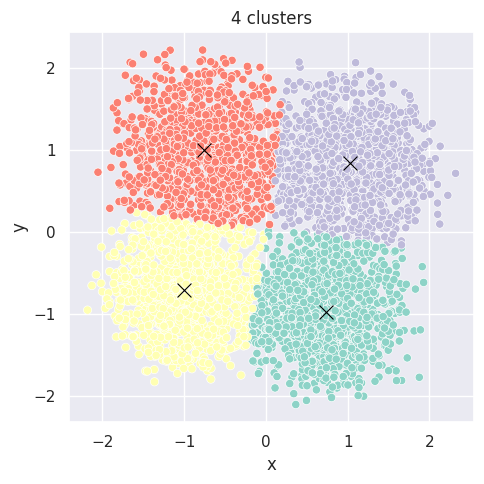

In [11]:
from sklearn.cluster import KMeans

k_4_means = KMeans(n_clusters=4, random_state=42).fit(data2[['x', 'y']])

data2['4-means'] = k_4_means.labels_

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(5,5))

sns.scatterplot(data2, x="x", y="y", hue='4-means', palette='Set3', ax = axes, legend = False)

sns.scatterplot(x=k_4_means.cluster_centers_[:,0], y=k_4_means.cluster_centers_[:,1], color='black', marker='x', s=100, ax = axes)

axes.set_title("4 clusters")

plt.tight_layout()

### k-Medoids

Uno de los problemas del algoritmo k-Means es que los centroides que genera pueden ser "sintéticos". Es decir, no tienen por que estar presentes en las observaciones del dataset, si no que pueden ser un punto cualquiera del espacio. El algoritmo k-Medoids soluciona este problema reemplazando los centroides por medoides: puntos de entre los observados que representan el centro del cluster.

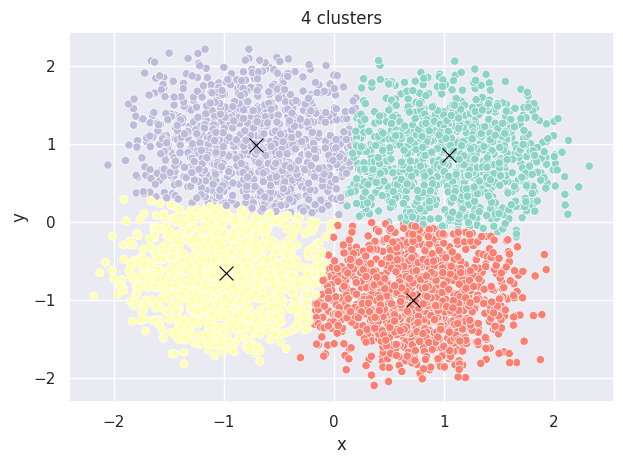

In [12]:
import kmedoids

k_4_medoids = kmedoids.KMedoids(n_clusters=4, random_state=42, metric="euclidean")
k_4_medoids.fit(data2[['x', 'y']].to_numpy())

data2['4-medoids'] = k_4_medoids.labels_

axes = plt.axes()

sns.scatterplot(data2, x="x", y="y", hue='4-medoids', palette='Set3', ax = axes, legend = False)
sns.scatterplot(x=k_4_medoids.cluster_centers_[:,0], y=k_4_medoids.cluster_centers_[:,1], color='black', marker='x', s=100, ax = axes)

axes.set_title("4 clusters")

plt.tight_layout()



In [14]:
print("k-Means:")

for centroid in k_4_means.cluster_centers_:
    print(f"\tCentroid {centroid} in data? {centroid in data2[['x', 'y']].to_numpy()}")

print("k-Medoids:")

for medoid in k_4_medoids.cluster_centers_:
    print(f"\tMedoid {medoid} in data? {medoid in data2[['x', 'y']].to_numpy()} (Observation {np.where(data2[['x', 'y']].to_numpy() == medoid)[0][0]})")

k-Means:
	Centroid [ 0.73759078 -0.97187437] in data? False
	Centroid [-0.9974559  -0.70892019] in data? False
	Centroid [1.02712147 0.84696877] in data? False
	Centroid [-0.75911506  0.99516257] in data? False
k-Medoids:
	Medoid [1.04591463 0.85673284] in data? True (Observation 3036)
	Medoid [-0.97943025 -0.65898913] in data? True (Observation 92)
	Medoid [-0.7120295   0.98192678] in data? True (Observation 3026)
	Medoid [ 0.71529591 -1.00160848] in data? True (Observation 2490)


## Clustering jerárquico

Los algoritmos de clustering jerárquico construyen una jerarquía de clústeres, agrupando todas las observaciones en una jerarquia, de forma que se pueda realizar un corte a posteriori en el numero de clusteres deseado. 

Los algoritmos jerarquicos se pueden dividir en aglomerativos, que parten de las observaciones individuales y van fusionando clústeres hasta tener un único grupo, y en divisivos, que parten de un único clúster grande y lo van dividiendo iterativamente hasta llegar a las observaciones individuales.

### Clustering aglomerativo

El clustering aglomerativo parte de las observaciones individuales y va construyendo un arbol en el que las diferentes ramas se van uniendo de forma que se minimicen las distancias entre ellas, generando así un agrupamiento jerarquico de todos los datos.

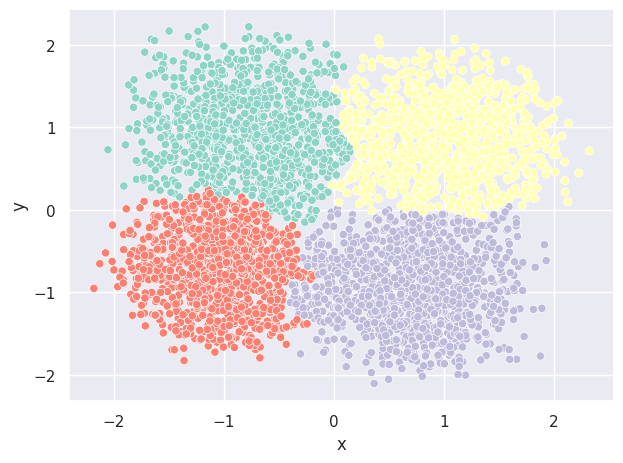

In [25]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(4, linkage="ward").fit(data2[['x', 'y']]) # single, average, complete, ward

data2['agg'] = agg.labels_

axes = plt.axes()

sns.scatterplot(data2, x="x", y="y", hue='agg', palette='Set3', ax = axes, legend = False)

plt.tight_layout()

Podemos imprimir el arbol generado en el agrupamiento (llamado dendograma) empleando las funciones que nos da `scipy`:

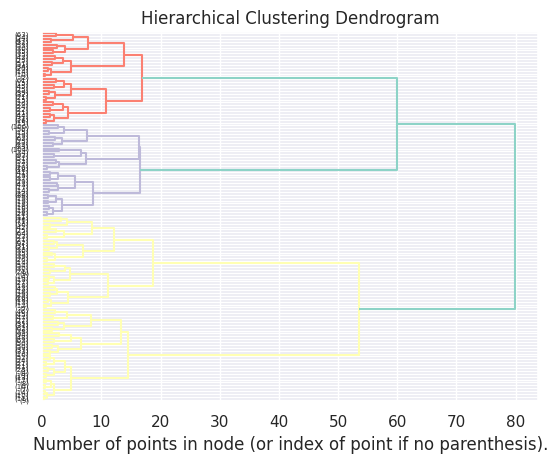

In [21]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(data2[['x', 'y']])

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=6, orientation="right")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Clustering basado en densidad

Los algoritmos de clustering basados en densidad identifican los clústeres como regiones del espacio de datos con una alta concentración de puntos, separadas por regiones de baja densidad.

### DBSCAN

Uno de los métodos de agrupamiento por densidad más usados es el DBSCAN. Este basa su funcionamiento en la clasificación de las observaciones en puntos núcleo (puntos con suficientes vecinos dentro de un radio especificado), puntos frontera (puntos alcanzables desde un punto núcleo pero sin suficientes vecinos propios) y puntos ruido (ninguno de los anteriores), y forma clústeres conectando puntos núcleo entre sí y añadiendo los puntos frontera alcanzables a esos clústeres. Una ventaja importante de DBSCAN es que automáticamente busca el número óptimo de clusters, sin tener que especificar nosotros uno. 

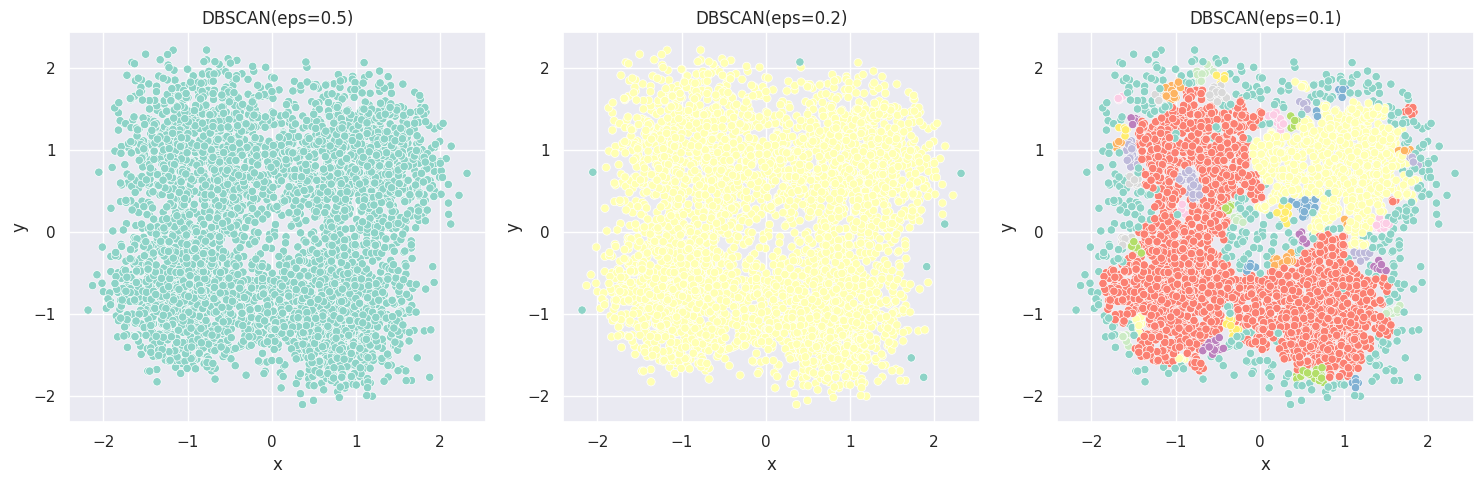

In [31]:
from sklearn.cluster import DBSCAN

dbscan05 = DBSCAN(eps=0.5).fit(data2[['x', 'y']])
dbscan02 = DBSCAN(eps=0.2).fit(data2[['x', 'y']])
dbscan01 = DBSCAN(eps=0.075).fit(data2[['x', 'y']])

data2['dbscan05'] = dbscan05.labels_
data2['dbscan02'] = dbscan02.labels_
data2['dbscan01'] = dbscan01.labels_

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

sns.scatterplot(data2, x="x", y="y", hue='dbscan05', palette='Set3', ax = axes[0], legend = False)
sns.scatterplot(data2, x="x", y="y", hue='dbscan02', palette='Set3', ax = axes[1], legend = False)
sns.scatterplot(data2, x="x", y="y", hue='dbscan01', palette='Set3', ax = axes[2], legend = False)

axes[0].set_title("DBSCAN(eps=0.5)");
axes[1].set_title("DBSCAN(eps=0.2)");
axes[2].set_title("DBSCAN(eps=0.1)");

plt.tight_layout()

El parámetro más importantes es eps (radio máximo para considerar dos puntos como vecinos), ya que es el que define la densidad de los clusters que estamos buscando. Si ponemos un valor muy pequeño, se buscarán clusters más densos y pequeños. 

El número mínimo de puntos en la vecindad también resulta importante, pero no al mismo nivel que el radio máximo.

### HDBSCAN

Uno de los problemas que presenta DBSCAN es que todos los clusters deben presentar la misma densidad de puntos. Para solucionar este inconveniente, podemos emplear HDBSCAN, una evolución de DBSCAN que construye una jerarquia de clusters basada en la densidad de los puntos y a continuación extrae los grupos más estables de dicha jerarquía, lo que permite trabajar con grupos de diferentes densidades. 

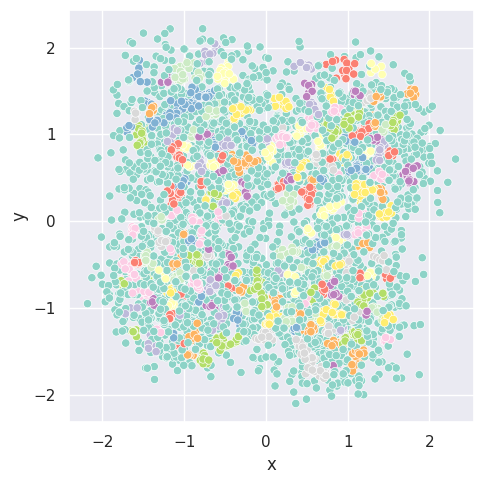

In [32]:
from sklearn.cluster import HDBSCAN

hdbscan = HDBSCAN().fit(data2[['x', 'y']])
data2['hdbscan'] = hdbscan.labels_

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(5, 5))

sns.scatterplot(data2, x="x", y="y", hue='hdbscan', palette='Set3', ax = axes, legend = False)

plt.tight_layout()

## Selección del número óptimo de clusters

Como hemos podido ver, los resultados de algunos algoritmos de agrupamiento son muy dependientes del numero de clusters seleccionado o de algun parámetro concreto (como por ejemplo la distancia entre puntos en DBSCAN). A continuación veremos algunos métodos que nos pueden servir para hacer una busqueda guiada del mejor valor para estos parámetros. 

### Método del codo (elbow)

El método del codo es un método que funciona analizando la varianza dentro de los clusters a medida que se aumenta el numero de estos. Podemos usarlo, por ejemplo, para buscar el $\epsilon$ optimo para ejecutar DBSCAN.

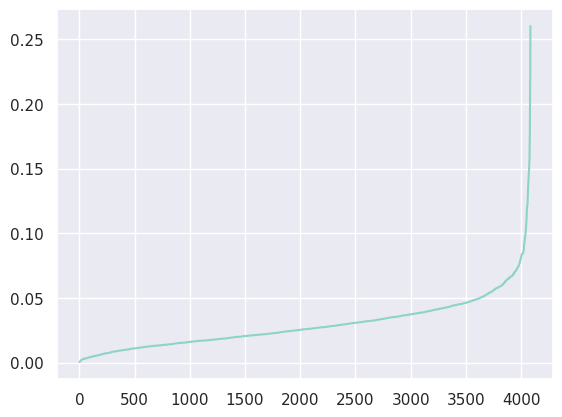

In [33]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5).fit(data2[['x', 'y']])
distances, indices = knn.kneighbors(data2[['x', 'y']])

distances = np.sort(distances, axis=0)[:,1]

plt.plot(distances)
plt.show()


Si lo que queremos es buscar el número óptimo de clusters tambien podemos emplear la librería `yellowbrick`.

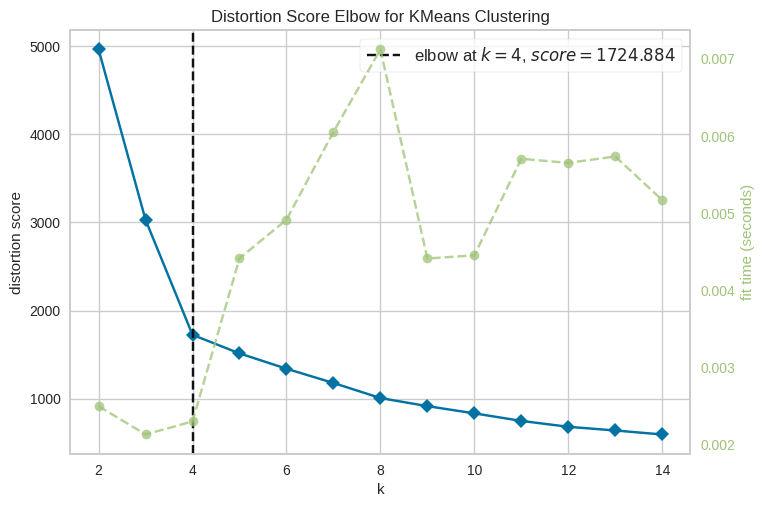

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2,15))

visualizer.fit(data2[["x", "y"]])
visualizer.show()

### Método de Silhouette

El método de Silhouette nos permite, a partir de las métricas de distancia intra-cluster e inter-cluster, calcular el número óptimo de clusters a la hora de agrupar un conjunto de datos.

Tambien podemos emplear la librería `yellowbrick` para ahorrarnos trabajo:

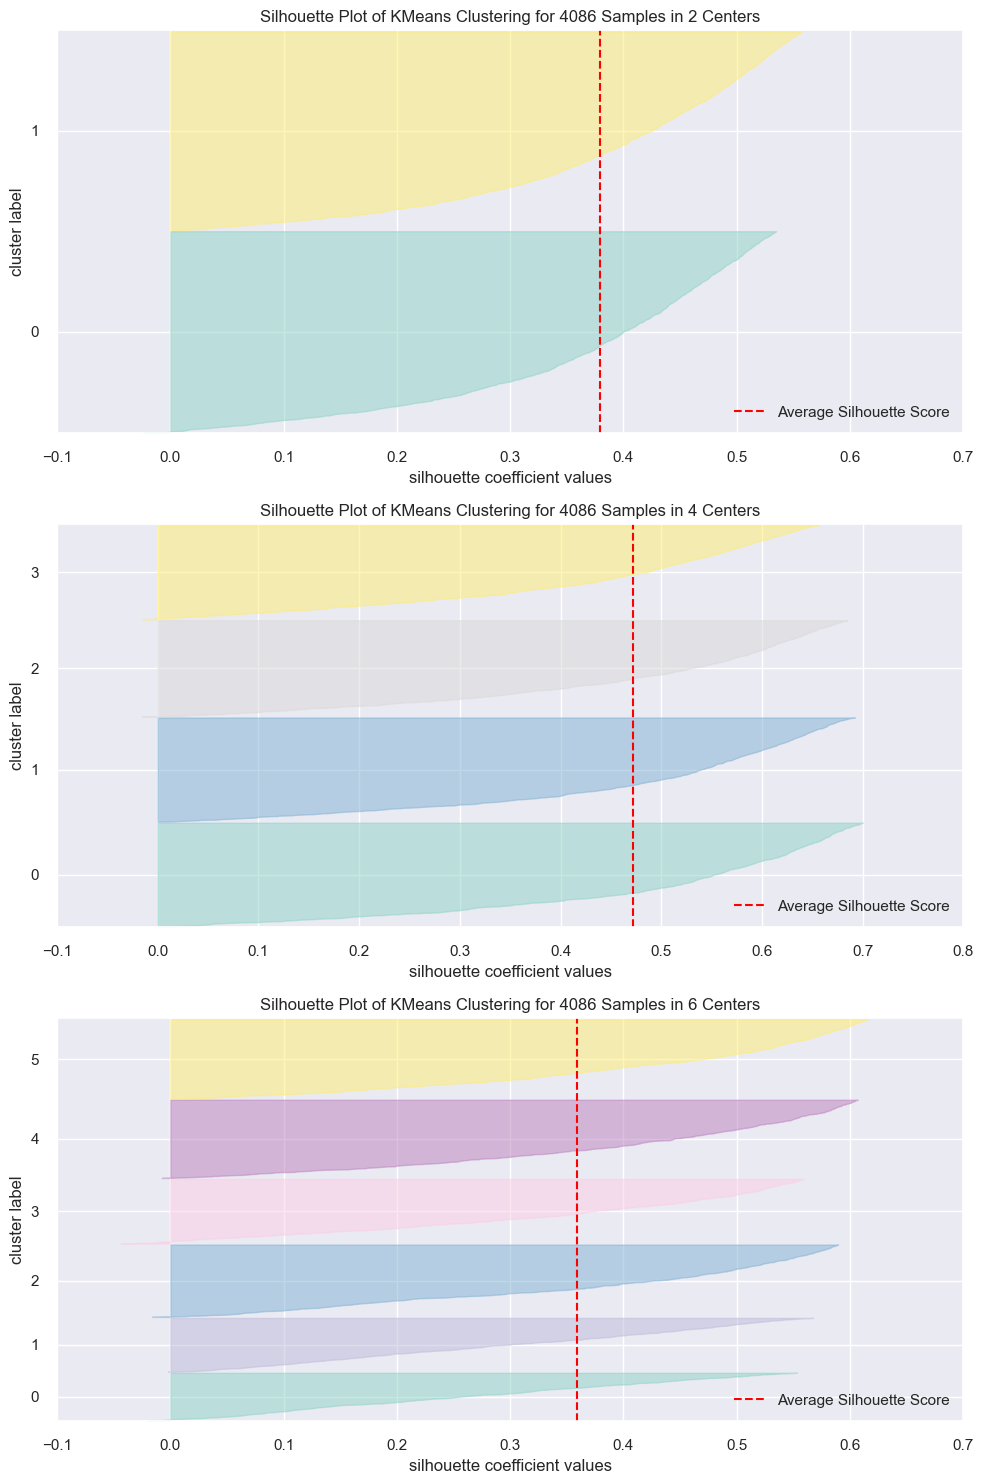

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

visualizer = SilhouetteVisualizer(KMeans(n_clusters=2, random_state=42), colors='Set3', alpha=1, ax=axes[0])
visualizer.fit(data2[['x', 'y']])
visualizer.finalize()

visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=42), colors='Set3', alpha=1, ax=axes[1])
visualizer.fit(data2[['x', 'y']])
visualizer.finalize()

visualizer = SilhouetteVisualizer(KMeans(n_clusters=6, random_state=42), colors='Set3', alpha=1, ax=axes[2])
visualizer.fit(data2[['x', 'y']])
visualizer.finalize()

plt.tight_layout()